In [1]:
import pandas as pd 
import numpy as np
import os
import sys
import networkx as nx

In [2]:
data = pd.read_excel('./CiudadesTrim2_2021/2021_trim_2_Cd_Acapulco.xls')

datos para sector primario 

P | PH | PM 
```
dat = data.iloc[29,[1,4,5,6]]
    if cont == 34:
        dat = data.iloc[32,[1,4,5,6]]
```
datos para el sector secunadario

S | SH | SM
```
dat = data.iloc[31,[1,4,5,6]]
    if cont == 34:
        dat = data.iloc[33,[1,4,5,6]]
```
datos para el sector terciario 

T | TH | TM
```
dat = data.iloc[35,[1,4,5,6]]
    if cont == 34:
        dat = data.iloc[37,[1,4,5,6]]
```

In [3]:
dfProTrim3 = pd.DataFrame( columns = ['Pri' , 'PriH', 'PriM','Sec','SecH','SecM','Ter','TerH','TerM'])

carpeta = './CiudadesTrim3_2021/'
archivos = os.listdir('./CiudadesTrim3_2021/')
ListaLineas = []
cont = 0
for archivo in archivos:
    path  = carpeta + archivo
    data = pd.read_excel(path)
    dat1 = data.iloc[29,[4,5,6]].values
    dat2 = data.iloc[31,[4,5,6]].values
    dat3 = data.iloc[35,[4,5,6]].values
    if cont == 33:
        dat1 = data.iloc[32,[4,5,6]].values
        dat2 = data.iloc[33,[4,5,6]].values
        dat3 = data.iloc[37,[4,5,6]].values
    lisAux = []
    lisAux.extend(dat1)
    lisAux.extend(dat2)
    lisAux.extend(dat3)
    dfProTrim3.loc[cont] = lisAux
    cont += 1

In [4]:
dfProTrim2 = pd.DataFrame( columns = ['Pri' , 'PriH', 'PriM','Sec','SecH','SecM','Ter','TerH','TerM'])

carpeta = './CiudadesTrim2_2021/'
archivos = os.listdir('./CiudadesTrim2_2021/')
ListaLineas = []
cont = 0
for archivo in archivos:
    path  = carpeta + archivo
    data = pd.read_excel(path)
    dat1 = data.iloc[29,[4,5,6]].values
    dat2 = data.iloc[31,[4,5,6]].values
    dat3 = data.iloc[35,[4,5,6]].values
    if cont == 33:
        dat1 = data.iloc[32,[4,5,6]].values
        dat2 = data.iloc[33,[4,5,6]].values
        dat3 = data.iloc[37,[4,5,6]].values
    lisAux = []
    lisAux.extend(dat1)
    lisAux.extend(dat2)
    lisAux.extend(dat3)
    dfProTrim2.loc[cont] = lisAux
    cont += 1

In [5]:
dfAtributes = dfProTrim3 - dfProTrim2

In [6]:
dfAtributes = dfAtributes.astype(float)

In [7]:
dfAtributes.to_csv('./nodesAtributes.csv',index=False)

# Modelado 

In [8]:
import geopy.distance
coor = pd.read_csv('./distanciasCiudades.csv')

In [9]:
disOp = {}
for i, e in enumerate(coor.values):
    nom1 = e[0]
    c1 = e[1:3]
    for i2, e2 in enumerate(coor.values):
        if i >= i2:
            continue
        nom2 = e2[0]
        c2 = e2[1:3]
        #print(nom1 , nom2, c1,c2)
        distancia = geopy.distance.distance(c1, c2).km
        disOp[nom1,nom2] = distancia 

In [10]:
listdis = disOp.items()

In [11]:
dataFG = []
for i in listdis:
    dataFG.append((i[0][0],i[0][1],i[1]))

In [12]:
G = nx.Graph()
G.add_weighted_edges_from(dataFG)

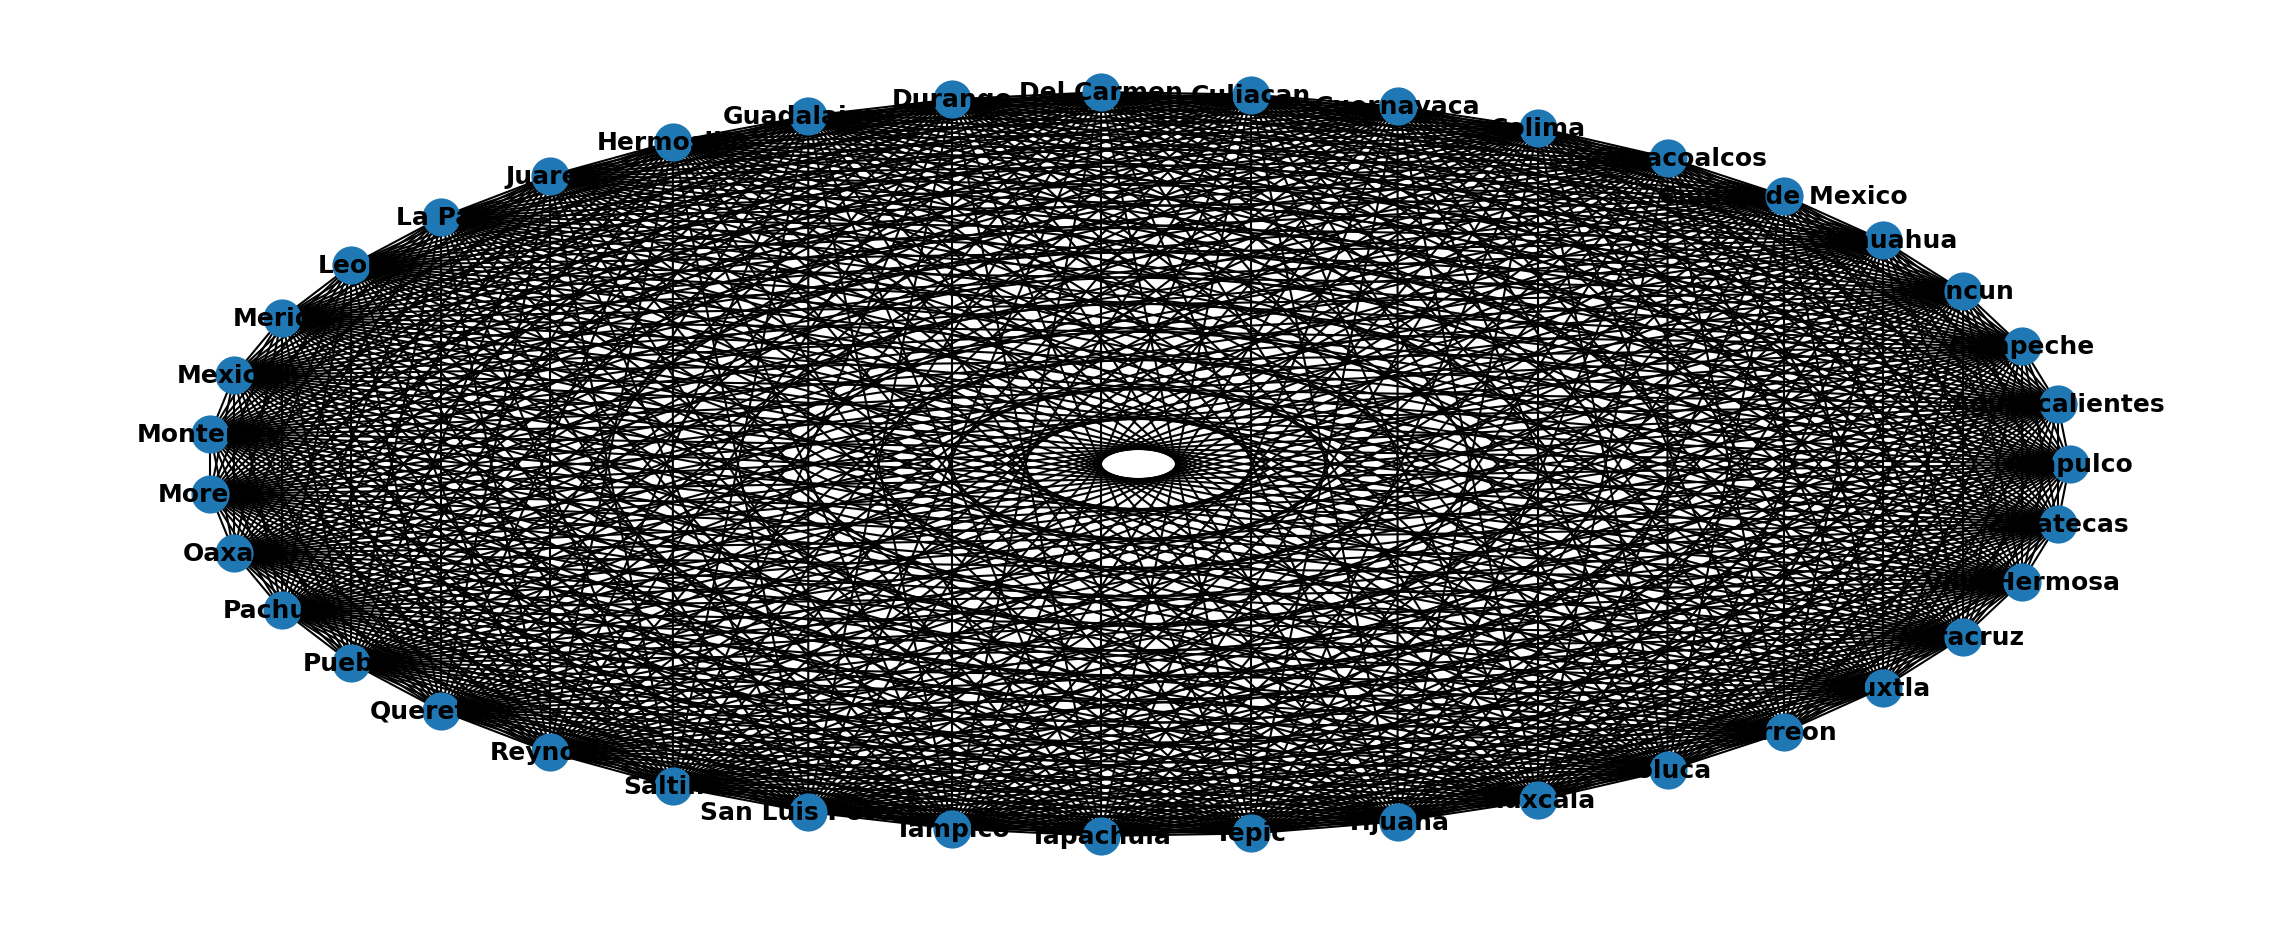

In [13]:
Layo = nx.circular_layout(G)
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(15, 6), dpi=150)
nx.draw(
    G, 
    with_labels=True, 
    font_weight='bold',
    pos = Layo
)

In [14]:
Dpos = {}
for i in coor.values:
    Dpos[i[0]] = i[1:3]

In [15]:
G1 = nx.Graph()
G1.add_weighted_edges_from(dataFG)

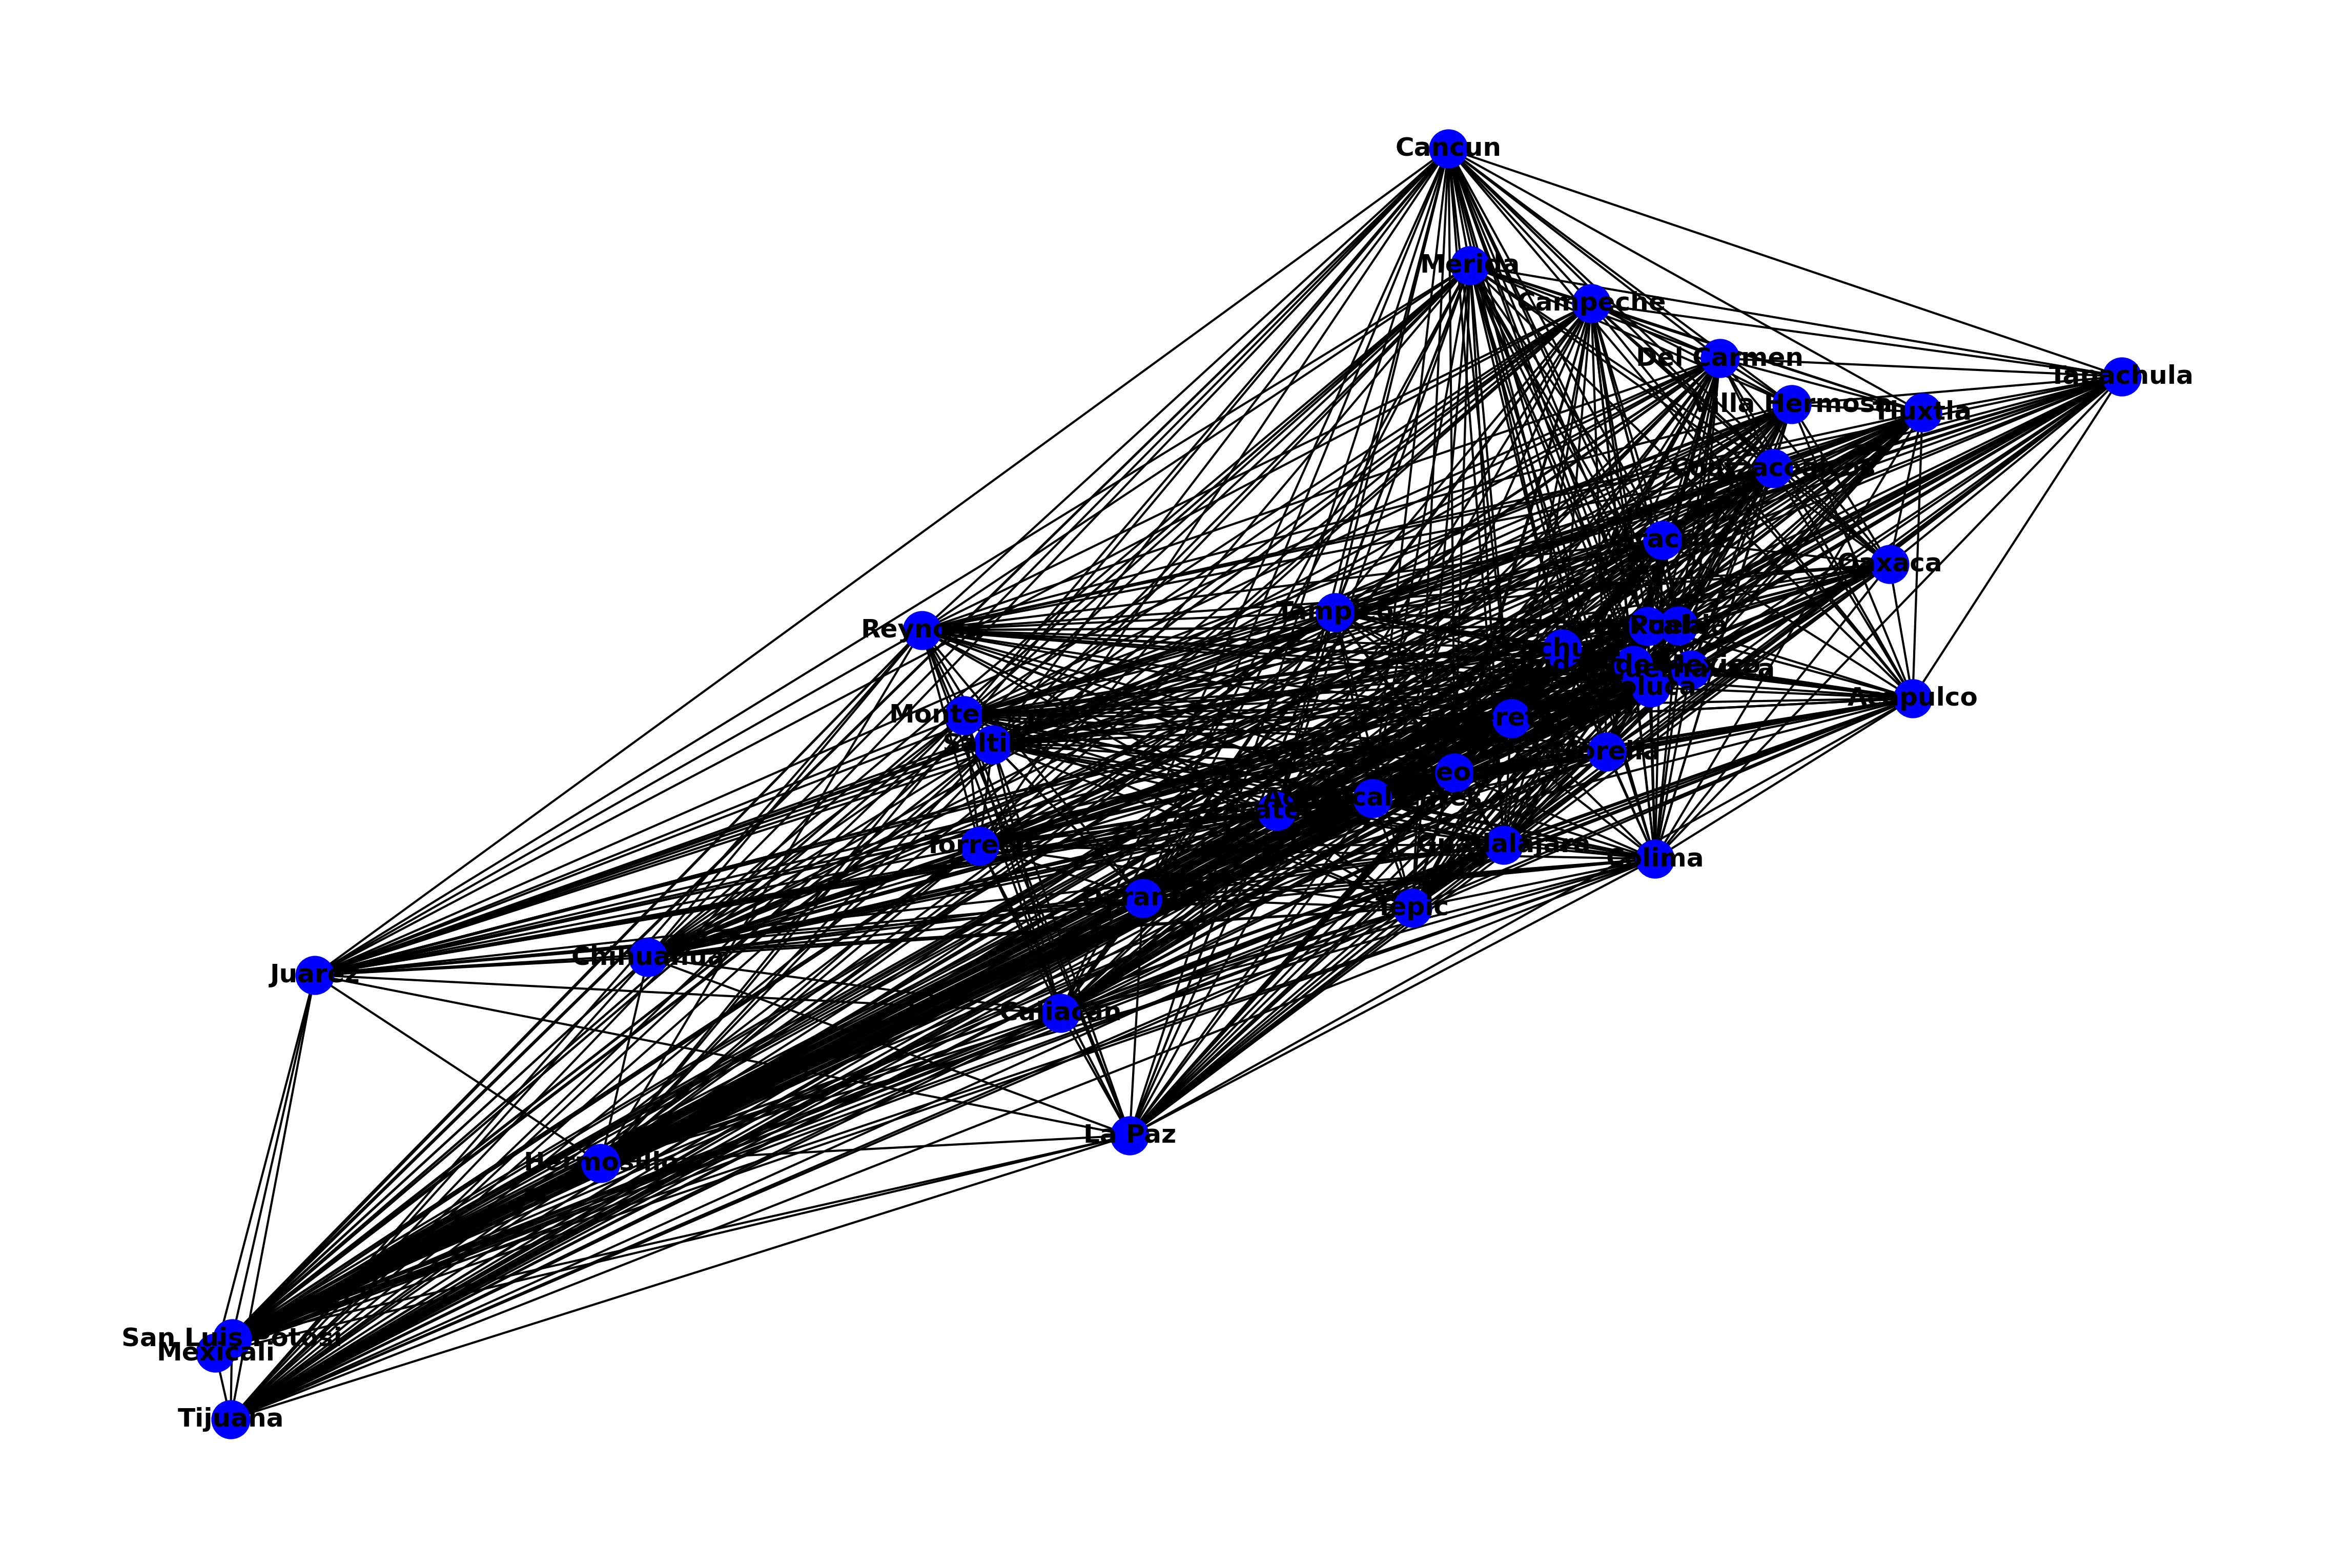

In [16]:
fig = plt.figure(1, figsize=(15, 10), dpi=300)
nx.draw(G1, Dpos, node_color="b",with_labels=True, 
    font_weight='bold')
plt.gca().invert_xaxis()

In [17]:
def prim(G):
    masinf=float('inf')
    A={v:(None,masinf) for v in G.nodes}
    v0=list(A.keys())[0]
    del(A[v0])

    aristas_buenas=[]

    for v in G.neighbors(v0):
        A[v]=(v0,G[v][v0]['weight'])

    while A:
        # Encontrar la mejor arista de T a A y agregarla al árbol.
        # Debe de ser de entre las mejores para cada vértice.
        mejor_peso=masinf
        for v in A.keys():
            if A[v][1]<mejor_peso:
                mejor=v
                mejor_peso=A[v][1]
        aristas_buenas.append((mejor,A[mejor][0],A[mejor][1]))
        del(A[mejor])

        # Actualizar las mejores para cada vértice, si es necesario.
        for v in G.neighbors(mejor):
            if v in A.keys():
                if A[v][1]>G[v][mejor]['weight']:
                    A[v]=(mejor,G[v][mejor]['weight'])
    return aristas_buenas

[]

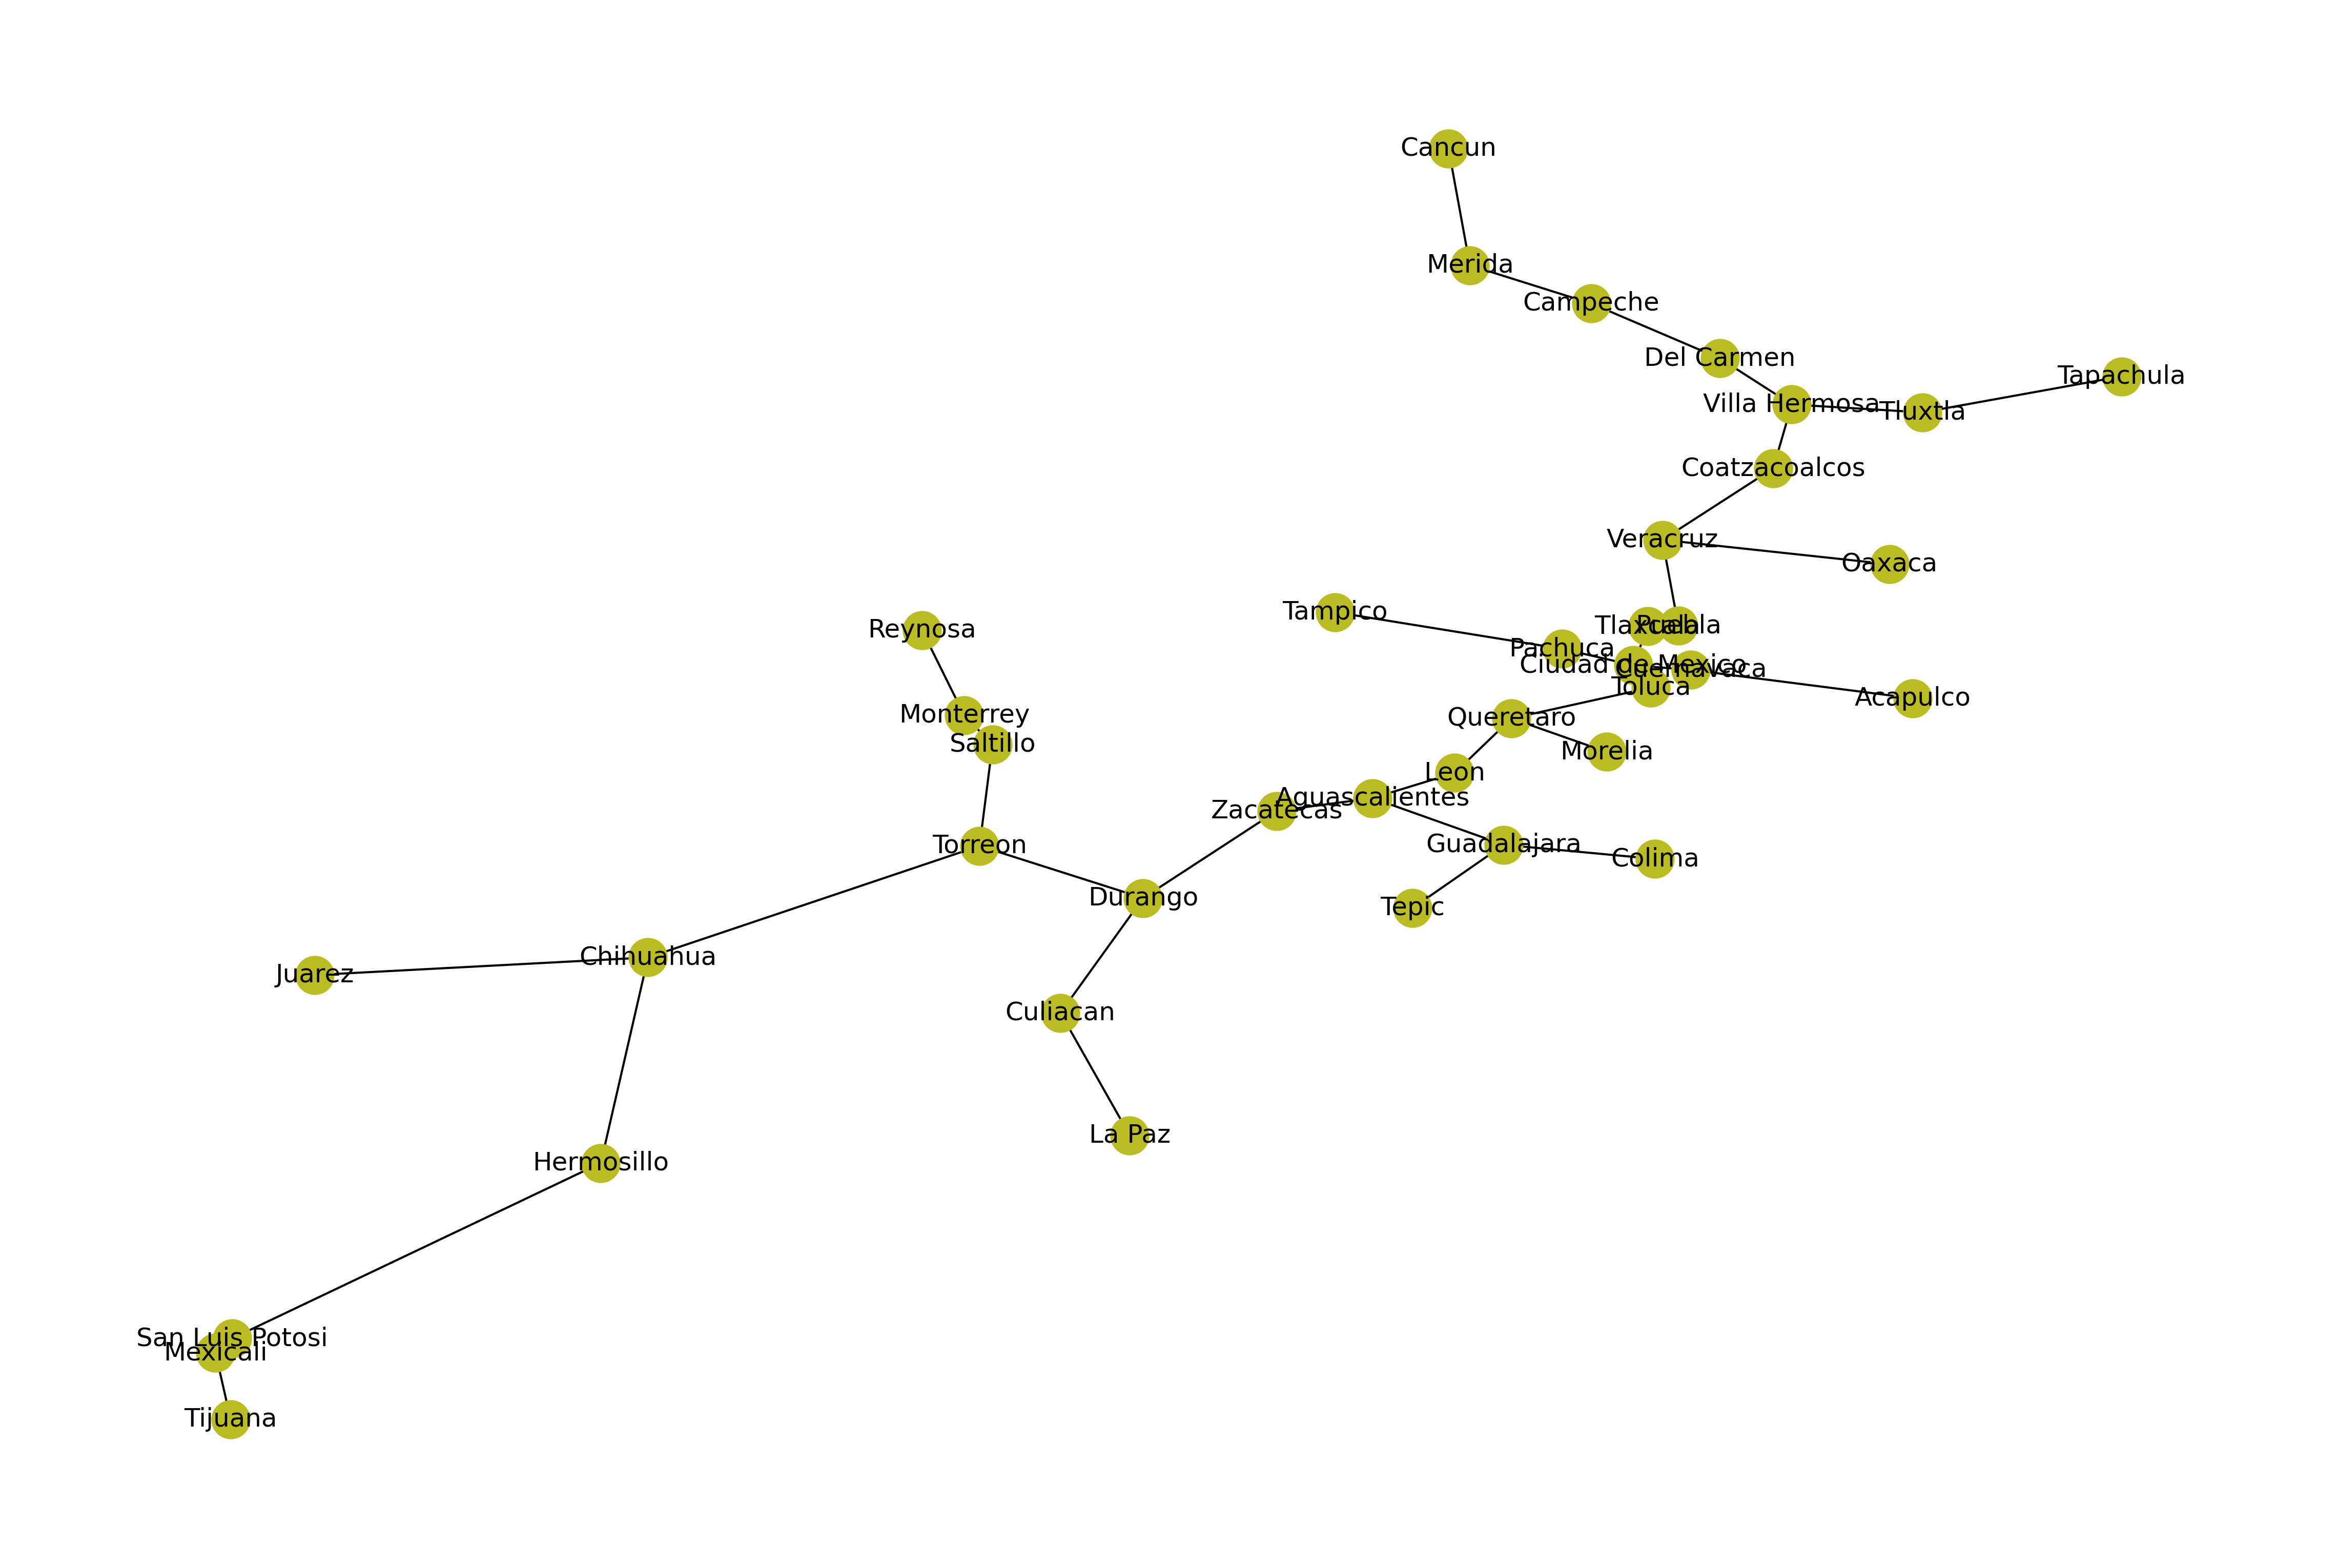

In [18]:
H=nx.Graph()
H.add_weighted_edges_from(prim(G))

fig = plt.figure(1, figsize=(15, 10), dpi=300)
nx.draw(H,pos=Dpos,with_labels=True, node_color='#bbbb22')
plt.gca().invert_xaxis()
plt.plot()

In [19]:
nodesAtrs = pd.read_csv('./nodesAtributes.csv')

In [20]:
nodesConcat = pd.concat([coor['Nombre'],nodesAtrs],axis=1)

In [21]:
node_attr = nodesConcat.set_index('Nombre').to_dict('index')

In [22]:
nx.set_node_attributes(H, node_attr)

In [23]:
def dijkstra(G,u,v):
    if u==v:
        return 0.0
    masinf=float('inf')
    vertices=list(G.nodes)
    distancias={w:masinf for w in vertices}
    fijos={w:False for w in vertices}
    padres={w:None for w in vertices}
    distancias[u]=0
    fijos[u]=True
    nuevo_fijo=u
    while not(all(fijos.values())):
        # Acualizar distancias.
        for w in G.neighbors(nuevo_fijo):
            if fijos[w]==False:
                nueva_dist=distancias[nuevo_fijo]+G[nuevo_fijo][w]['weight']
                if distancias[w]>nueva_dist:
                    distancias[w]=nueva_dist
                    padres[w]=nuevo_fijo
        # Encontrar el nuevo a fijar.
        mas_chica=masinf
        for w in vertices:
            if fijos[w]==False and distancias[w]<mas_chica:
                optimo=w
                mas_chica=distancias[w]
        nuevo_fijo=optimo
        fijos[nuevo_fijo]=True
        # Cuando fije el vértice final v, dar el camino.
        if nuevo_fijo==v:
            camino=[v]
            while camino[0]!=u:
                camino=[padres[camino[0]]]+camino
            return distancias[v]

In [24]:
def dijkstra_Cut(G,n,cutoff):
    nodDistDic = {}
    for i in H.nodes:
        dist = dijkstra(G,n,i)
        if dist < cutoff:
            nodDistDic[i] = dist
    return nodDistDic

In [25]:
def ciudades_cercanas(G,ciudad,distanciaMax):
    sp = dijkstra_Cut(G,ciudad, distanciaMax)
    GCC = G.subgraph(sp).copy() 
    return GCC

In [26]:
def CiuMasAfectDistMin(G,sector,distanciaMax=300,numCiu=3,plotGraph=False):
    afectadosTer = {}
    empleosAfec = 10000
    nodcen = ''
    for c in G.nodes:
        I4 = ciudades_cercanas(G,c,distanciaMax)
        NTer = nx.get_node_attributes(I4,sector)
        N_Ter_sorted = sorted(NTer.items(), key=lambda x: x[1])
        cconMin = dict(N_Ter_sorted[0:numCiu])
        sumadeCEA = sum(cconMin.values())
        if sumadeCEA < empleosAfec:
            empleosAfec = sumadeCEA
            afectadosTer.clear()
            afectadosTer = cconMin.copy()
            I5 = I4.copy()
            nodcen = c    
        I4.clear()
    if plotGraph:
        nx.draw(I5,pos=Dpos,with_labels=True, node_color='#bbbb22')
        plt.title(nodcen)
    return afectadosTer

{'Guadalajara': -19750.0, 'Leon': -5575.0, 'Morelia': -2210.0}

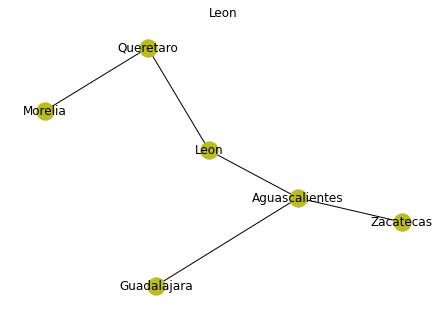

In [27]:
CiuMasAfectDistMin(H,'TerM',300,3,True)

In [28]:
print(CiuMasAfectDistMin(H,'PriH',300,3))
print(CiuMasAfectDistMin(H,'SecH',300,3))
print(CiuMasAfectDistMin(H,'TerH',300,3))

{'Ciudad de Mexico': -6213.0, 'Tlaxcala': -1020.0, 'Puebla': -792.0}
{'Puebla': -16805.0, 'Veracruz': -5011.0, 'Pachuca': -2348.0}
{'Tijuana': -21052.0, 'Mexicali': -4443.0, 'San Luis Potosi': -2445.0}


Pri
{'Ciudad de Mexico': -5336.0, 'Tlaxcala': -1090.0, 'Puebla': -1042.0}


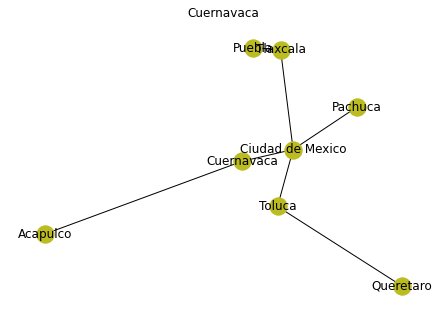

PriH
{'Ciudad de Mexico': -6213.0, 'Tlaxcala': -1020.0, 'Puebla': -792.0}


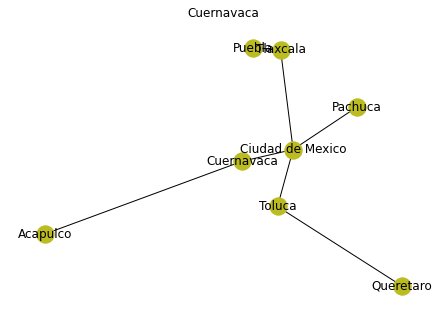

PriM
{'Morelia': -459.0, 'Guadalajara': -299.0, 'Aguascalientes': -231.0}


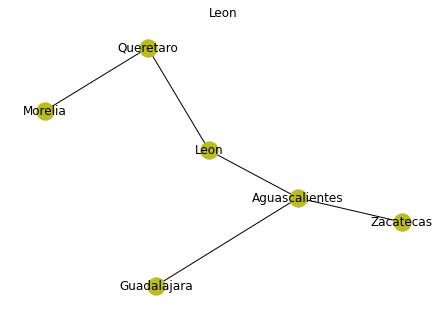

Sec
{'Puebla': -24992.0, 'Veracruz': -6334.0, 'Pachuca': -1452.0}


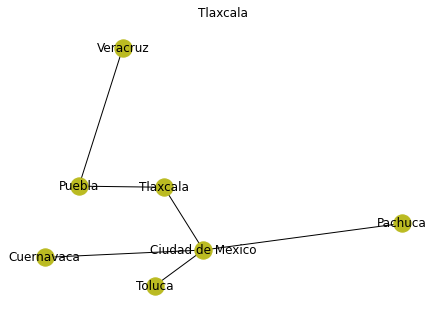

SecH
{'Puebla': -16805.0, 'Veracruz': -5011.0, 'Pachuca': -2348.0}


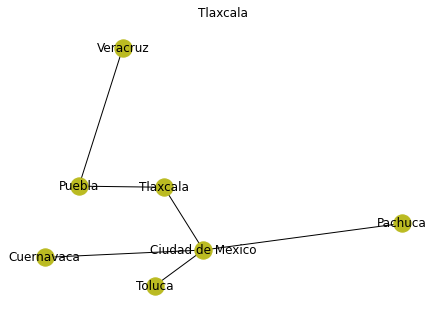

SecM
{'Monterrey': -14919.0, 'Torreon': -907.0, 'Reynosa': 4157.0}


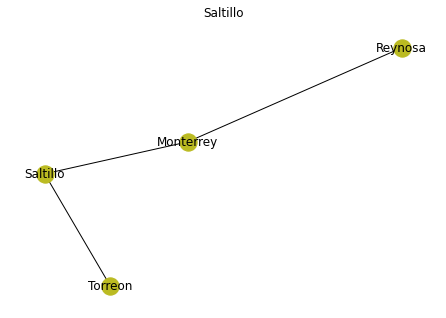

Ter
{'Tijuana': -24497.0, 'San Luis Potosi': -21181.0, 'Mexicali': -2646.0}


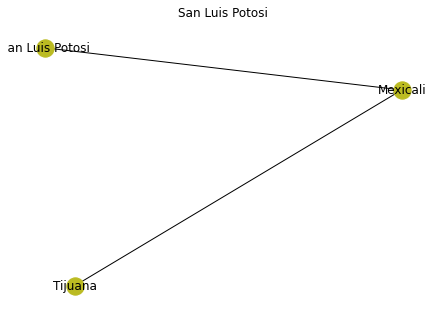

TerH
{'Tijuana': -21052.0, 'Mexicali': -4443.0, 'San Luis Potosi': -2445.0}


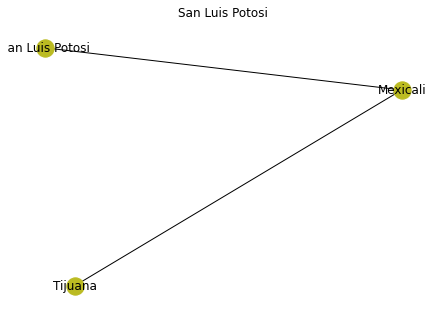

TerM
{'Guadalajara': -19750.0, 'Leon': -5575.0, 'Morelia': -2210.0}


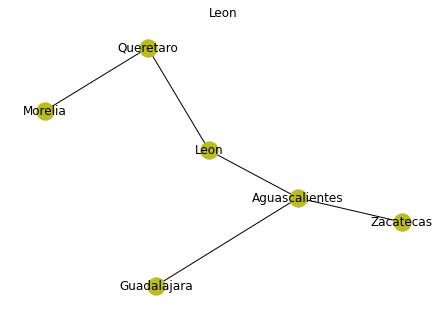

In [35]:
# Tres ciudades cercanas a una distancia menor a 300 km mas afectadas 
for i in H.nodes['Toluca']:
    print(i)
    print(CiuMasAfectDistMin(H,i,300,3,True))
    plt.show()